In [10]:
%pylab inline
import keras, os, pynbody, struct

def mocklist():
    # .lua are the parameter files, where you find the settings of the simulations
    files = os.popen("ls /home/xiaodongli/data/simulation/om_As/*.lua").read().split('\n')
    cosmologies = []
    mocks = {}; ifile = 0
    for nowfile in files:
        nowstr = nowfile[-39:-10]; ifile += 1; cosmologies.append(nowstr[0:15])
        if nowstr == '': continue
        try:
            mocks[nowstr] = {'om': float(nowstr[2:7]), 'As':  float(nowstr[10:15]), 
                             'sigma8': float(nowstr[23:29])}
            ranseed = float(open(nowfile, 'r').readline().split()[2])
            mocks[nowstr]['ranseed'] = int(ranseed); #print(ranseed)
        except:
            pass
    return cosmologies, files, mocks

def cosmostr(om, As):
    return 'om%.3f'%om+'_As%.3f'%As
def snpfiles(cosmology, snpstr='c'):
    return os.popen("ls ./om_As/"+cosmology+"*snap*"+snpstr+".*").read().split()
def gridfiles(cosmology, snpstr='c'):
    return os.popen("ls ./om_As/"+cosmology+"*grid*"+snpstr+".*").read().split()
def load_grid(gridfile, snpstr='c', printinfo = False):
    gridfile = os.popen("ls ./om_As/om%.3f"%om+"_As2.000_sigma8_*grid*"+snpstr+".*").read().split()[0]
    nowf = open(gridfile,'rb')
    size = struct.unpack('f'*1, nowf.read(4*1))[0]
    grid_nc = struct.unpack('i'*1, nowf.read(4*1))[0]
    data = struct.unpack('f'*grid_nc**3, nowf.read(4*grid_nc**3))
    if printinfo:
        print ('read in box size     \n\t',size)
        print ('read in num_grid      \n\t',grid_nc, )
        print ('read in coarse grid \n\tsize    : ', len(data), '\n\texpect  : ', grid_nc**3)

    nowf.close()
    return np.array(data).reshape((grid_nc, grid_nc,grid_nc))

Populating the interactive namespace from numpy and matplotlib


### Simulations we have, and their parameters

In [11]:
cosmologies, filenames, mocks = mocklist()
print ('In total ', len(cosmologies), 'cosmologies')

In total  467 cosmologies


### Count the number of particles (use one simulation as example); should be 128**3

In [12]:
cosmology = cosmologies[0]

print ('Count #-par \n\t', sum([len(pynbody.load(snpfile)['pos']) for snpfile in snpfiles(cosmology)]), 
                             '\nexpect \n\t', 128**3)

Count #-par 
	 2097152 
expect 
	 2097152


### Visualization: density field .vs. particle postions

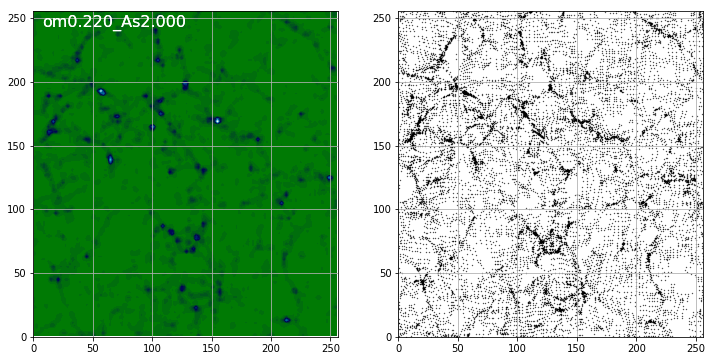

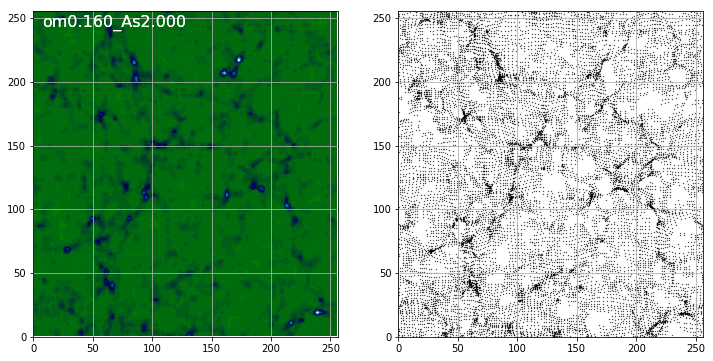

In [16]:
size = 256

for om in [0.22,0.16]:
    fig, (ax1, ax2) = subplots(1,2,figsize=(12,6))
    cosmology = cosmostr(om, 2.0)

    # plot grid
    data = load_grid(cosmology, 'c')
    ax1.contourf(np.linspace(1, 255, 128), np.linspace(1, 255, 128), data[:,:,0].T, 30, cmap='ocean' )

    # plot snp
    pos = []
    for snpfile in snpfiles(cosmology, 'c'):
        data = pynbody.load(snpfile) ['pos']
        pos.append( np.copy(data[where(data[:,2]<2.)]))
    pos = np.concatenate(pos)

    ax2.scatter(pos[:,0], pos[:,1], s=0.1, c='k', alpha=1)
    for ax in [ax1, ax2]:
        ax.grid(); ax.set_xlim(0,size); ax.set_ylim(0,size); 
        ax1.text(size*0.03, size*0.95, cosmology, fontsize=16, color='white')
    plt.show()